In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [4]:
df.isnull().values.any()

False

In [6]:
0.7 * 546

382.2

In [15]:
df_3 = df.head(383)

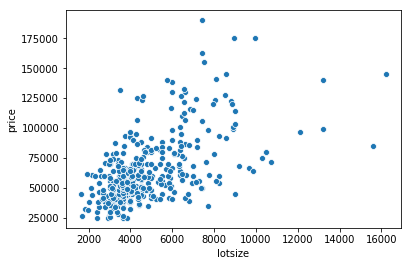

In [18]:
sns.scatterplot(x='lotsize',y='price',data=df_3)

In [124]:
def linear_regression_model(x,y):
    n= np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    #centroid = x_mean, y_mean
    
    #parameters: y=b_0 +b_1X
    xS = np.sum(x*y) - n*y_mean*x_mean
    yS = np.sum(x*x) - n*x_mean*x_mean
    b_1 = xS / yS
    b_0 = y_mean - b_1*x_mean
    return (b_1, b_0)

def regression_line(x,y,l):
    plt.scatter(x, y , color='g')
    yP = l[1]+l[0]*x
    plt.plot(x, yP, color='b')
    plt.xlabel('Lot size')
    plt.ylabel('House Price')
    plt.title('Price of a house based on the lotsize')
    plt.show()

In [63]:
X = df['lotsize']
y = df['price']

X = X.to_frame()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm = LinearRegression()

In [68]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
print(lm.intercept_)

33129.91914648967


In [71]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
lotsize,6.696808


In [72]:
predictions = lm.predict(X_test)

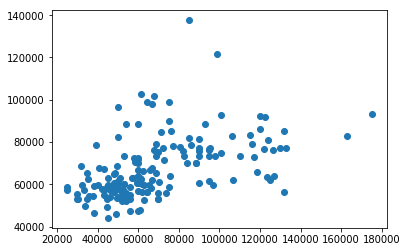

In [74]:
plt.scatter(y_test,predictions)

In [75]:
from sklearn import metrics

In [76]:
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('SSE', metrics.s)

MSE 624146570.3661455


In [77]:
from sklearn.datasets import load_boston

In [78]:
boston = load_boston()

In [79]:
type(boston)

sklearn.utils.Bunch

In [80]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [81]:
boston_df = boston.data

In [86]:
boston_df.shape

(506, 13)

In [90]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df_y = pd.DataFrame(boston.target)

In [93]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [94]:
X_train, X_test, y_train,y_test = train_test_split(boston_df,boston_df_y,test_size=0.3)

In [96]:
reg = LinearRegression()

In [98]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
bost_coeff = reg.coef_
bost_coeff = bost_coeff.reshape(1,13)

In [123]:
pd.DataFrame(bost_coeff,boston_df.columns,columns=['Coefficient'])

ValueError: Shape of passed values is (13, 1), indices imply (1, 13)

In [115]:
bost_pred = reg.predict(X_test)

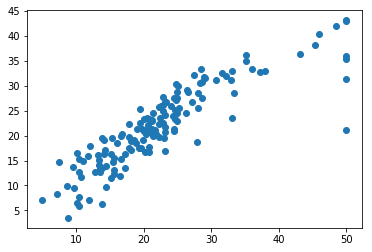

In [120]:
plt.scatter(y_test,bost_pred)

In [122]:
print('MSE:',metrics.mean_squared_error(y_test,bost_pred))

MSE: 21.29095302539295
